# Exploring a dictionary-based approach with Empath

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/IDEM105-EDI/blob/main/empath.ipynb).

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

In [1]:
!pip install empath
import pandas as pd
from empath import Empath
lexicon = Empath()

In [2]:
transcript_df = pd.read_excel('data/sample_transcript.xlsx')
transcript_df.sample(3)

,timestamp,speaker,utterance
490,00:33:00,Alpha,Is it a wing or is it just covering?
576,00:40:54,Bravo,Also not yet at the stage where this is stable...
591,00:42:28,Alpha,Yeah.


In [3]:
from datetime import time
def convert_to_seconds(t_str):
    t = time.fromisoformat(t_str)
    sec = t.hour * 3600 + t.minute * 60 + t.second
    return sec
    
transcript_df['timestamp_sec'] = transcript_df['timestamp'].apply(convert_to_seconds)
transcript_df.sample(3)

,timestamp,speaker,utterance,timestamp_sec
639,00:45:22,Charlie,Wow.,2722
415,00:27:58,Bravo,That seems to be all right.,1678
218,00:11:03,Alpha,Should we explain what we're doing? Is that in...,663


In [4]:
utterances = transcript_df['utterance'].to_list()

## Get the list of categories from Empath
Empath has a set of predefined categories. To create a new category of your own, use the following command. The command takes two inputs: a category name, and a short list of 3 to 5 sample or "seed" words to help Empath populate the category.

In [5]:
category_name = "thinking"
category_seed_words = ["think", "make", "inspiration"]
lexicon.create_category(category_name, category_seed_words)

["Because", "actually", "If", "write", "though", "guess", "cause", "Maybe", "maybe", "mean", "honestly", "like", "anyway", "inspiration", "hope", "understand", "might", "help", "cause", "try", "Now", "story", "Plus", "should", "work", "hopefully", "Or", "Also", "probably", "forget", "anyways", "Well", "motivation", "find", "whatever", "best", "wish", "so", "thought", "Honestly", "suppose", "means", "things", "anything", "add", "reason", "always", "believe", "Sometimes", "Actually", "wanted", "ideas", "So", "seriously", "remind", "cause", "anyway", "trust", "Hopefully", "figured", "part", "need", "Anyway"]


To analyze a piece of text using this category, use the following function.

In [6]:
lexicon.analyze("Let's maybe try this new approach.", categories=["thinking"], normalize=True)

{'thinking': 0.3333333333333333}

## Analysing a piece of text using Empath
Let's say you want to see if a text uses a higher density of `thinking` words (i.e, the number of 'positive emotion' words divided by the total words in the review) than another text. For that matter, we just want to see what the `thinking` scores are across all the reviews. We can use the following approach.

Some categories: prototyping, fixation, agreement, disagreement, insight

We can create a function for this approach so that we can pass this function to the dataframe.

In [7]:
def calc_thinking(text):
    category = 'thinking'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['thinking'] = transcript_df['utterance'].apply(calc_thinking)
                                                                
transcript_df.sample(5)                                                                               

,timestamp,speaker,utterance,timestamp_sec,thinking
349,00:22:10,Alpha,Do you want it like this or like this?,1330,0.222222
605,00:43:19,Charlie,That's right.,2599,0.000000
115,00:05:42,Charlie,Do you mean these squares?,342,0.200000
38,00:02:15,Alpha,"The hard work. I have a pen, yeah. Ehm...",135,0.000000
239,00:12:07,Bravo,"So it should be lower in the back here, yeah.",727,0.200000


We can then plot a histogram of the scores to see their distribution.

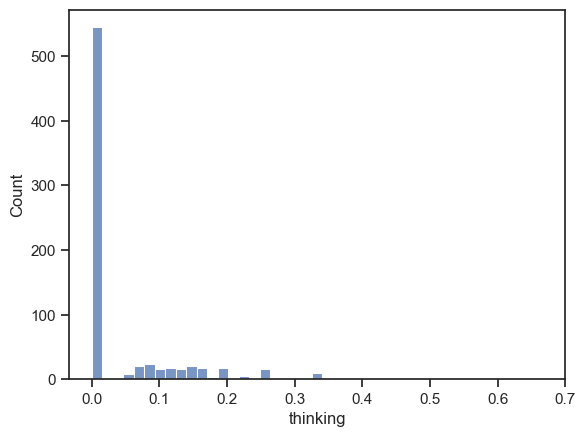

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(dpi=100)

g = sns.histplot(x='thinking', data=transcript_df)

<Figure size 640x480 with 0 Axes>

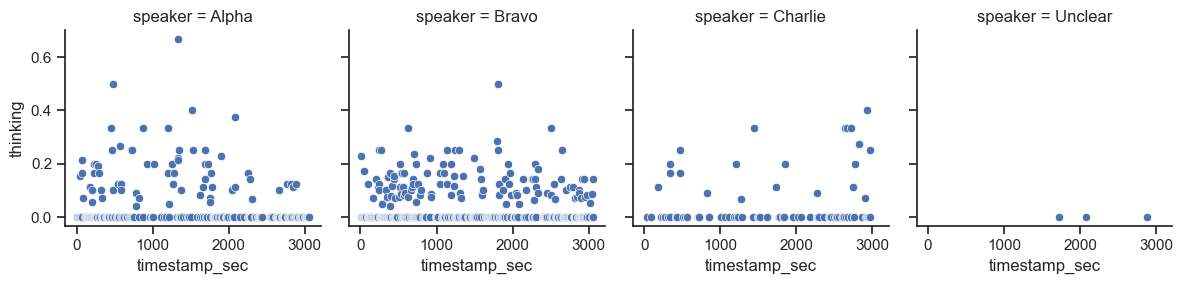

In [9]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "thinking")


## A similar approach for sentiment analysis

In [10]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
def sentiment(text) :
    vs = analyzer.polarity_scores(text)['compound']
    return vs

In [12]:
transcript_df['sentiment'] = transcript_df['utterance'].apply(sentiment)
transcript_df.sample(3)

,timestamp,speaker,utterance,timestamp_sec,thinking,sentiment
661,00:46:40,Bravo,It's actually pretty insane to watch it all back.,2800,0.111111,0.1280
479,00:32:07,Bravo,Stick one on this side and then.,1927,0.000000,0.0000
595,00:42:37,Alpha,Our duck is falling apart.,2557,0.000000,-0.1531


<Figure size 640x480 with 0 Axes>

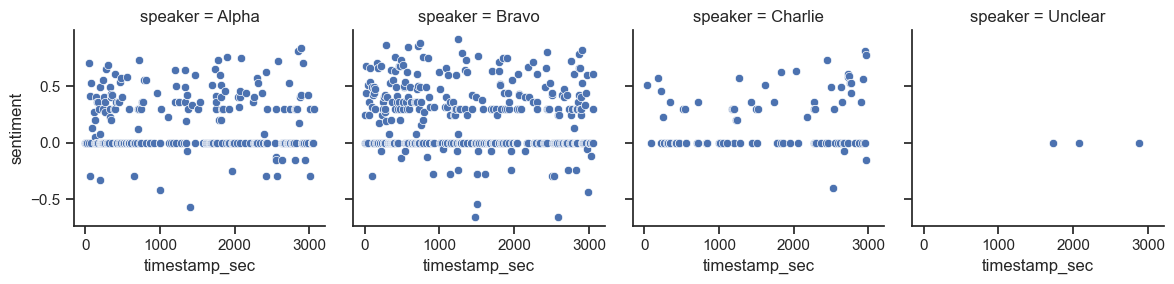

In [13]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "sentiment")

<Axes: xlabel='thinking', ylabel='sentiment'>

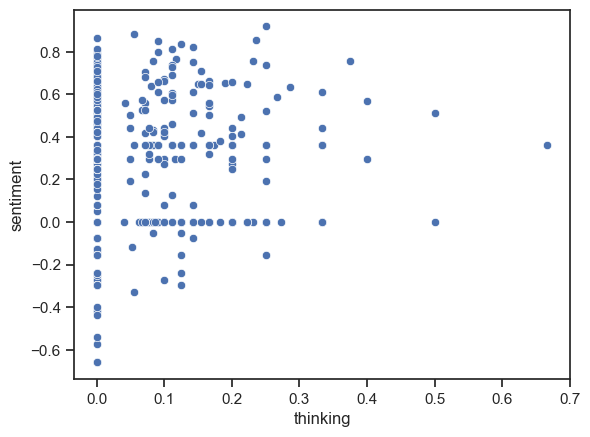

In [14]:
sns.scatterplot(data=transcript_df, x = "thinking", y="sentiment")

## Exercise

Identify a particular behaviour you notice in your session's transcript.


**Specify:** think of words related to "convergence"

Can you create an Empath category for this behaviour?
Analyze the transcript with your new category.
Compare your transcript with someone else's?

